#Overview

The datafile taken is a time-series data that consists of flight details from MAA (Madras Airport) to DXB (Dubai, United Arab Emirates) of the year 2021. It contains 768 samples and 31 feature columns.

The purpose of this notebook file is to determine if the dataset is stationary or not stationary. Data preprocessing is done. Several tests are done on the dataset to analyze its stationarity. The tests done are :
- Rolling Statistics Test
- Augmented Dickey-Fuller (ADF) Test
- Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
- Zivot-Andrews Test

### 1- What is a time series data?
A time series dataset is a dataset that tracks the movement of data points over a period of time, recorded at regular intervals.

### 2- What is data stationary?
Stationarity is an important concept in the field of time series analysis with tremendous influence on how the data is perceived and predicted. Time series data are said to be stationary if they do not have any seasonal effects or any trends. A stationary data has the property that the mean, variance and autocorrelation remains almost the same over various time intervals.

In the dataset we have used, when the dataset is split into two parts and comparision of the mean and variance is done to check for stationarity, the mean is around 29.1875 and variance is around 650. So, in this case the dataset is stationary.

### 3- Why is data stationary necessary for forecasting?
When forecasting or predicting the future, most time series models assume that each point is independent of one another. Therefore, a stationary time series data is necessary for forecasting in order to obtain acceptable results.

### 4- What will happen if data is not stationary?
Summary statistics like the mean and variance do change over time, providing a drift in the concepts a model may try to capture. Therefore, the data cannot be forecasted using traditional time series models if the data is not stationary.

### 5- How to ensure whether the given data is stationary?
There are some methods to check whether a time series data is stationary or non-stationary.

- Graph : A plot can be made on the data and visually checked if there are any obvious trends or seasonality.

- Statistical Summary : Statistical measures like mean, variance and autocorrelation are measured for different periods of interval. If the corresponding measures for the different time intervals are neareer to each other (with some considered significance level) then the data is stationary else it is a non-stationary data.

- Statistical Tests : There are some statistical tests to check for stationarity on the data. Common tests used are also followed for this dataset such as :
 - Augmented Dickey-Fuller (ADF) Test
 - Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
 - Zivot-Andrews Test

### 6- How much data (volume of data) do we need for stationary?
Now we know that in order to check for stationarity in the data, the statistical summary (mean, variance, autocorrelation) should be nearer for different time intervals. Therefore, the data should be sufficient enough to be split into different time intervals.

Dataset from the same interval of time would obviously will be stationary since the time is constant (or almost constant) in this case.

### 7- List the steps involved to check whether the data is stationary?
- Performing visual interpretation on the dataset as mentioned above.
- Performing statistical comparisions as mentioned above.
- Performing various statistical test on the dependent feature involves,
 - Setting up the null hypothesis and alternate hypothesis.
 - Test results (p-value) are compared with necessary significant levels (critical levels) to decide whether to reject the null hypothesis or not.
 - Finally, the acceptance or rejection of null hypothesis (or alternate hypothesis) answers whether the data is stationary or not.

***Author : DeepSphere.AI***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries and Dependencies

In [2]:
!pip install statsmodels --upgrade
!pip install openpyxl==3.0.0

     |████████████████████████████████| 9.8 MB 12.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
     |████████████████████████████████| 172 kB 13.0 MB/s 
  Created wheel for openpyxl: filename=openpyxl-3.0.0-py2.py3-none-any.whl size=241207 sha256=453eec9f4509f94239040615b69f137e6866c4bb9d43a4ed027764d0be85f13d
  Stored in directory: /root/.cache/pip/wheels/c7/64/ff/ce98f6e1d2701ae8e216c875da62feed2839ac8a3cae0ab8af
Successfully built openpyxl
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.0.9
    Uninstalling openpyxl-3.0.9:
      Successfully uninstalled openpyxl-3.0.9


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.stattools import zivot_andrews

# Import Dataset

In [4]:
dataset = pd.read_excel("/content/drive/MyDrive/FlyDubai-Base Data DP_v6 (1).xlsx")
dataset

,DATA CATEGORY,DATA SOURCE,MODEL NAME,TRAVEL DATE,YEAR,QUARTER,MONTH,WEEK,DAY,HOUR,REGION,ORGIN,DESTINATION,FLIGHT,CAPACITY,PRICE TYPE,PROMOTION,ROUNDTRIP OR ONEWAY,CUSTOMER TYPE,PRODUCT TYPE,LOCATION LIFESTYLE,LOCATION ECONOMICAL STATUS,LOCATION EMPLOYMENT STATUS,LOCATION EVENT,SOURCE WIND,SOURCE HUMIDITY,SOURCE PRECIPITATION,DESTINATION WIND,SOURCE HUMIDITY.1,DESTINATION PRECIPITATION,NUMBER OF BOOKING
0,ACTUAL,ETL,NaN,103202106,2021,Q1,JAN,1,SUNDAY,6,ASIA,MAA,DXB,FD101,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,BUSINESS TRAVEL,FIRST CLASS,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,5
1,ACTUAL,ETL,NaN,103202106,2021,Q1,JAN,1,SUNDAY,6,ASIA,MAA,DXB,FD101,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,FREQUENT FLYER,FIRST CLASS,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,10
2,ACTUAL,ETL,NaN,103202106,2021,Q1,JAN,1,SUNDAY,6,ASIA,MAA,DXB,FD101,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,FIRST TIME FLYER,FIRST CLASS,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,5
3,ACTUAL,ETL,NaN,103202106,2021,Q1,JAN,1,SUNDAY,6,ASIA,MAA,DXB,FD101,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,RARE FLYER,FIRST CLASS,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,5
4,ACTUAL,ETL,NaN,103202106,2021,Q1,JAN,1,SUNDAY,6,ASIA,MAA,DXB,FD102,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,BUSINESS TRAVEL,BUSINESS CLASS,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,ACTUAL,ETL,NaN,329202124,2021,Q1,MAR,4,FRIDAY,24,ASIA,MAA,DXB,FD101,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,RARE FLYER,ECONOMY PLUS,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,30
764,ACTUAL,ETL,NaN,329202124,2021,Q1,MAR,4,FRIDAY,24,ASIA,MAA,DXB,FD102,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,BUSINESS TRAVEL,ECONOMY,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,75
765,ACTUAL,ETL,NaN,329202124,2021,Q1,MAR,4,FRIDAY,24,ASIA,MAA,DXB,FD102,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,FREQUENT FLYER,ECONOMY,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,63
766,ACTUAL,ETL,NaN,329202124,2021,Q1,MAR,4,FRIDAY,24,ASIA,MAA,DXB,FD102,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,FIRST TIME FLYER,ECONOMY,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,63


# Class TimeSeriesData

In [5]:
class TimeSeriesData:

  def __init__(self, dataset, target_column): #constructor
    #dataset - time series dataset
    #target_column - name of target column in the dataset
    self.dataset = dataset
    self.null_columns = self.dataset.columns[self.dataset.isna().any()].tolist() #contains null columns in the dataset
    self.constant_column = self.dataset.columns[self.dataset.nunique()==1].tolist() #contains constant columns in the dataset
    self.target_column = target_column

  def display_columns(self): #display column names present in the dataset
    print(self.dataset.columns)

  def display_samples(self, random_state=42): #display random samples from the dataset
    display(self.dataset.sample(10, random_state=random_state))

  def drop_columns(self, columns): # drop columns inplace from the dataset
    # columns - list of columns to drop from the dataset
    self.dataset.drop(columns, axis=1, inplace=True)

  def graphical_analysis(self): #analyse the stationarity by histogram
    self.dataset[[self.target_column]].hist()

  def distribution_plot(self, column_name): #plot graph
    plt.figure(figsize=(22,8))
    plt.title('Number of Enrollments (2018 - 2021)')
    plt.xlabel('Date')
    plt.ylabel('Number of Enrollments')
    plt.plot(self.dataset[column_name]);
    plt.show()

  def mean_variance_stationary_analysis(self, column_name):
    # Splitting the time series data into two contiguous sequence and calculating mean and variance to compare the means and variances of the two sequence.
    #column_name - name of the column to be analysed
    X = self.dataset[[column_name]].values
    split = round(len(X) / 2)
    X1, X2 = X[0:split], X[split:]

    mean1, mean2 = X1.mean(), X2.mean()
    var1, var2 = X1.var(), X2.var()
    print("Mean :",mean1, mean2)
    print("Variance :", var1, var2)

  def rolling_statistics_test(self, column_name):
    # Function to give a visual representation of the data to define its stationarity.
    #column_name - name of the column to be tested
    X = self.dataset[column_name]

    rolling_mean = X.rolling(window=12).mean()
    rolling_std = X.rolling(window=12).std()
    plt.figure(figsize=(20,8))
    orignal_data = plt.plot(X , color='black', label='Original') #original data
    roll_mean_plot = plt.plot(rolling_mean , color='red', label='Rolling Mean')  #rolling mean
    roll_std_plot = plt.plot(rolling_std, color='blue', label = 'Rolling Standard Deviation')  #rolling SD
    plt.legend(loc='best')
    plt.title("Rolling mean and Standard Deviation")
    plt.show(block=False)

  def augmented_dickey_fuller_test(self, column_name):
    #The Augmented Dickey-Fuller test is one of the more widely used type of statistical test (called a unit root test)
    #that it determines how strongly a time series is defined by a trend.

    #column_name - name of the column to be tested
    X = self.dataset[column_name].dropna()
    adf_test_result = adfuller(X)
    print(f'ADF Statistic: {adf_test_result[0]}')
    print(f'p-value: {adf_test_result[1]}')

    print('Critial Values:')
    for key, value in adf_test_result[4].items():
        print(f'   {key}, {value}')

    if(adf_test_result[0] < adf_test_result[4]['1%']):
      print("\n The Data is Stationary")
    else:
      print("\nThe Data is Non-Stationary")


  def kwiatkowski_phillips_schmidt_shin_test(self, column_name):
    # The Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test figures out if a time series is stationary around
    # a mean or linear trend, or is non-stationary due to a unit root.

    #column_name - name of the column to be tested
    X = self.dataset[column_name].dropna()
    print ('Results of KPSS Test:')
    kpss_test = kpss(X, regression='c')
    kpss_test_output = pd.Series(kpss_test[0:3], index=['Test Statistic','p-value','#Lags Used'])

    for key,value in kpss_test[3].items():
        kpss_test_output['Critical Value (%s)'%key] = value
    print(kpss_test_output)

    if(kpss_test[1] > 0.05):
      print("\n The Data is Stationary\n\n")
    else:
      print("\nThe Data is Non-Stationary\n\n")
    
  def zivot_andrews_test(self, column_name):
    #column_name - name of the column to be tested
    X = self.dataset[column_name].dropna()
    t_stat, p_value, critical_values, _, _ = zivot_andrews(X)
    print(f'Zivot-Andrews Statistic: {t_stat:.2f}')

    for key, value in critical_values.items():
        print('Critial Values:')
        print(f'   {key}, {value:.2f}')

    print(f'\np-value: {p_value:.6f}')
    
    if(p_value <= 0.05):
      print("Stationary")
    else:
      print("Non-Stationary")

  def calculating_derivatives(self): #calculating three orders of differentiations
    self.dataset['diff_1'] = self.dataset[self.target_column].diff(periods=1)
    self.dataset['diff_2'] = self.dataset[self.target_column].diff(periods=2)
    self.dataset['diff_3'] = self.dataset[self.target_column].diff(periods=3)

  def log_transform_derivative_1(self): #transform the column by logarithmic and then calculating the first order derivative
    self.dataset['log_diff_1'] = np.log(self.dataset[self.target_column]).diff().dropna()

# Preprocessing

## Function to convert date to suitable format


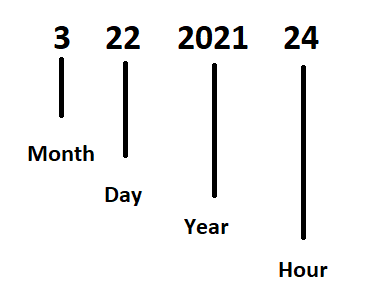

In [6]:
def convert_to_date(x):
  #Travel Date represents the Date of the flight operation. Ex: 322202124 (MM-DD-YYYY: HH)
  day = format(int(x[1:3]), "02d")
  month = format(int(x[0]), "02d")
  year = '-2021 '
  hour = format(int(x[-2:]),"02d")

  date_string = day + '-' + month + year + hour
  return date_string

In [7]:
#convert date to convienient format
# Travel Date represents the Date of the flight operation. Ex: 322202124 (MM-DD-YYYY: HH)
dataset['TRAVEL DATE'] = dataset['TRAVEL DATE'].astype(str)
dataset['TRAVEL DATE'] = dataset['TRAVEL DATE'].apply(convert_to_date)

dataset.sample(10, random_state=42)

,DATA CATEGORY,DATA SOURCE,MODEL NAME,TRAVEL DATE,YEAR,QUARTER,MONTH,WEEK,DAY,HOUR,REGION,ORGIN,DESTINATION,FLIGHT,CAPACITY,PRICE TYPE,PROMOTION,ROUNDTRIP OR ONEWAY,CUSTOMER TYPE,PRODUCT TYPE,LOCATION LIFESTYLE,LOCATION ECONOMICAL STATUS,LOCATION EMPLOYMENT STATUS,LOCATION EVENT,SOURCE WIND,SOURCE HUMIDITY,SOURCE PRECIPITATION,DESTINATION WIND,SOURCE HUMIDITY.1,DESTINATION PRECIPITATION,NUMBER OF BOOKING
668,ACTUAL,ETL,NaN,19-03-2021 12,2021,Q1,MAR,3,TUESDAY,12,ASIA,MAA,DXB,FD102,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,BUSINESS TRAVEL,ECONOMY,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,67
324,ACTUAL,ETL,NaN,10-02-2021 06,2021,Q1,FEB,2,SUNDAY,6,ASIA,MAA,DXB,FD102,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,BUSINESS TRAVEL,BUSINESS CLASS,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,10
624,ACTUAL,ETL,NaN,15-03-2021 24,2021,Q1,MAR,2,FRIDAY,24,ASIA,MAA,DXB,FD101,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,BUSINESS TRAVEL,FIRST CLASS,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,8
690,ACTUAL,ETL,NaN,22-03-2021 24,2021,Q1,MAR,3,FRIDAY,24,ASIA,MAA,DXB,FD101,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,FIRST TIME FLYER,FIRST CLASS,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,6
473,ACTUAL,ETL,NaN,26-02-2021 12,2021,Q1,FEB,4,TUESDAY,12,ASIA,MAA,DXB,FD101,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,FREQUENT FLYER,ECONOMY PLUS,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,37
204,ACTUAL,ETL,NaN,24-01-2021 06,2021,Q1,JAN,4,SUNDAY,6,ASIA,MAA,DXB,FD102,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,BUSINESS TRAVEL,ECONOMY,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,50
97,ACTUAL,ETL,NaN,14-01-2021 18,2021,Q1,JAN,2,THURSDAY,18,ASIA,MAA,DXB,FD101,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,FREQUENT FLYER,FIRST CLASS,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,13
336,ACTUAL,ETL,NaN,12-02-2021 12,2021,Q1,FEB,2,TUESDAY,12,ASIA,MAA,DXB,FD101,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,BUSINESS TRAVEL,FIRST CLASS,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,11
568,ACTUAL,ETL,NaN,08-03-2021 24,2021,Q1,MAR,1,FRIDAY,24,ASIA,MAA,DXB,FD101,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,BUSINESS TRAVEL,ECONOMY PLUS,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,32
148,ACTUAL,ETL,NaN,19-01-2021 12,2021,Q1,JAN,3,TUESDAY,12,ASIA,MAA,DXB,FD102,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,BUSINESS TRAVEL,BUSINESS CLASS,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,12


Values in the columns 'HOUR' and 'MONTH' are also present in the column 'TRAVEL DATE'. So dropping 'HOUR' and 'MONTH' features as they contain only redundant information.

In [8]:
dataset.drop(['MONTH', ' HOUR'], axis=1, inplace=True)
dataset.sample(10, random_state=42)

,DATA CATEGORY,DATA SOURCE,MODEL NAME,TRAVEL DATE,YEAR,QUARTER,WEEK,DAY,REGION,ORGIN,DESTINATION,FLIGHT,CAPACITY,PRICE TYPE,PROMOTION,ROUNDTRIP OR ONEWAY,CUSTOMER TYPE,PRODUCT TYPE,LOCATION LIFESTYLE,LOCATION ECONOMICAL STATUS,LOCATION EMPLOYMENT STATUS,LOCATION EVENT,SOURCE WIND,SOURCE HUMIDITY,SOURCE PRECIPITATION,DESTINATION WIND,SOURCE HUMIDITY.1,DESTINATION PRECIPITATION,NUMBER OF BOOKING
668,ACTUAL,ETL,NaN,19-03-2021 12,2021,Q1,3,TUESDAY,ASIA,MAA,DXB,FD102,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,BUSINESS TRAVEL,ECONOMY,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,67
324,ACTUAL,ETL,NaN,10-02-2021 06,2021,Q1,2,SUNDAY,ASIA,MAA,DXB,FD102,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,BUSINESS TRAVEL,BUSINESS CLASS,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,10
624,ACTUAL,ETL,NaN,15-03-2021 24,2021,Q1,2,FRIDAY,ASIA,MAA,DXB,FD101,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,BUSINESS TRAVEL,FIRST CLASS,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,8
690,ACTUAL,ETL,NaN,22-03-2021 24,2021,Q1,3,FRIDAY,ASIA,MAA,DXB,FD101,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,FIRST TIME FLYER,FIRST CLASS,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,6
473,ACTUAL,ETL,NaN,26-02-2021 12,2021,Q1,4,TUESDAY,ASIA,MAA,DXB,FD101,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,FREQUENT FLYER,ECONOMY PLUS,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,37
204,ACTUAL,ETL,NaN,24-01-2021 06,2021,Q1,4,SUNDAY,ASIA,MAA,DXB,FD102,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,BUSINESS TRAVEL,ECONOMY,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,50
97,ACTUAL,ETL,NaN,14-01-2021 18,2021,Q1,2,THURSDAY,ASIA,MAA,DXB,FD101,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,FREQUENT FLYER,FIRST CLASS,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,13
336,ACTUAL,ETL,NaN,12-02-2021 12,2021,Q1,2,TUESDAY,ASIA,MAA,DXB,FD101,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,BUSINESS TRAVEL,FIRST CLASS,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,11
568,ACTUAL,ETL,NaN,08-03-2021 24,2021,Q1,1,FRIDAY,ASIA,MAA,DXB,FD101,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,BUSINESS TRAVEL,ECONOMY PLUS,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,32
148,ACTUAL,ETL,NaN,19-01-2021 12,2021,Q1,3,TUESDAY,ASIA,MAA,DXB,FD102,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,BUSINESS TRAVEL,BUSINESS CLASS,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,12


## Encoding

### Customer Type

Converting the categorical column 'CUSTOMER TYPE' to ordinal values.

Ordinality Considered :
- 'BUSINESS TRAVEL' : 4
- 'FREQUENT FLYER' : 3
- 'FIRST TIME FLYER' : 1
- 'RARE FLYER' : 2

In [9]:
#Converting the categorical column 'CUSTOMER TYPE' to ordinal values.
customer_type = {'BUSINESS TRAVEL':4, 'FREQUENT FLYER':3, 'FIRST TIME FLYER':1, 'RARE FLYER':2} #ordinality of customer type column
dataset.replace({'CUSTOMER TYPE': customer_type}, inplace=True)
dataset.sample(10, random_state=42)

,DATA CATEGORY,DATA SOURCE,MODEL NAME,TRAVEL DATE,YEAR,QUARTER,WEEK,DAY,REGION,ORGIN,DESTINATION,FLIGHT,CAPACITY,PRICE TYPE,PROMOTION,ROUNDTRIP OR ONEWAY,CUSTOMER TYPE,PRODUCT TYPE,LOCATION LIFESTYLE,LOCATION ECONOMICAL STATUS,LOCATION EMPLOYMENT STATUS,LOCATION EVENT,SOURCE WIND,SOURCE HUMIDITY,SOURCE PRECIPITATION,DESTINATION WIND,SOURCE HUMIDITY.1,DESTINATION PRECIPITATION,NUMBER OF BOOKING
668,ACTUAL,ETL,NaN,19-03-2021 12,2021,Q1,3,TUESDAY,ASIA,MAA,DXB,FD102,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,4,ECONOMY,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,67
324,ACTUAL,ETL,NaN,10-02-2021 06,2021,Q1,2,SUNDAY,ASIA,MAA,DXB,FD102,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,4,BUSINESS CLASS,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,10
624,ACTUAL,ETL,NaN,15-03-2021 24,2021,Q1,2,FRIDAY,ASIA,MAA,DXB,FD101,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,4,FIRST CLASS,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,8
690,ACTUAL,ETL,NaN,22-03-2021 24,2021,Q1,3,FRIDAY,ASIA,MAA,DXB,FD101,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,1,FIRST CLASS,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,6
473,ACTUAL,ETL,NaN,26-02-2021 12,2021,Q1,4,TUESDAY,ASIA,MAA,DXB,FD101,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,3,ECONOMY PLUS,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,37
204,ACTUAL,ETL,NaN,24-01-2021 06,2021,Q1,4,SUNDAY,ASIA,MAA,DXB,FD102,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,4,ECONOMY,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,50
97,ACTUAL,ETL,NaN,14-01-2021 18,2021,Q1,2,THURSDAY,ASIA,MAA,DXB,FD101,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,3,FIRST CLASS,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,13
336,ACTUAL,ETL,NaN,12-02-2021 12,2021,Q1,2,TUESDAY,ASIA,MAA,DXB,FD101,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,4,FIRST CLASS,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,11
568,ACTUAL,ETL,NaN,08-03-2021 24,2021,Q1,1,FRIDAY,ASIA,MAA,DXB,FD101,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,4,ECONOMY PLUS,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,32
148,ACTUAL,ETL,NaN,19-01-2021 12,2021,Q1,3,TUESDAY,ASIA,MAA,DXB,FD102,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,4,BUSINESS CLASS,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,12


### Product Type

Converting the categorical column 'PRODUCT TYPE' to ordinal values.

Ordinality Considered :
- 'FIRST CLASS' : 4
- 'BUSINESS CLASS' : 3
- 'ECONOMY PLUS' : 1
- 'ECONOMY' : 2

In [10]:
#Converting the categorical column 'PRODUCT TYPE' to ordinal values.
travel_class = {'FIRST CLASS':4, 'BUSINESS CLASS':3, 'ECONOMY PLUS':2, 'ECONOMY':1} #ordinality of travel class column
dataset.replace({'PRODUCT TYPE ': travel_class}, inplace=True)
dataset.sample(10, random_state=42)

,DATA CATEGORY,DATA SOURCE,MODEL NAME,TRAVEL DATE,YEAR,QUARTER,WEEK,DAY,REGION,ORGIN,DESTINATION,FLIGHT,CAPACITY,PRICE TYPE,PROMOTION,ROUNDTRIP OR ONEWAY,CUSTOMER TYPE,PRODUCT TYPE,LOCATION LIFESTYLE,LOCATION ECONOMICAL STATUS,LOCATION EMPLOYMENT STATUS,LOCATION EVENT,SOURCE WIND,SOURCE HUMIDITY,SOURCE PRECIPITATION,DESTINATION WIND,SOURCE HUMIDITY.1,DESTINATION PRECIPITATION,NUMBER OF BOOKING
668,ACTUAL,ETL,NaN,19-03-2021 12,2021,Q1,3,TUESDAY,ASIA,MAA,DXB,FD102,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,4,1,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,67
324,ACTUAL,ETL,NaN,10-02-2021 06,2021,Q1,2,SUNDAY,ASIA,MAA,DXB,FD102,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,4,3,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,10
624,ACTUAL,ETL,NaN,15-03-2021 24,2021,Q1,2,FRIDAY,ASIA,MAA,DXB,FD101,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,4,4,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,8
690,ACTUAL,ETL,NaN,22-03-2021 24,2021,Q1,3,FRIDAY,ASIA,MAA,DXB,FD101,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,1,4,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,6
473,ACTUAL,ETL,NaN,26-02-2021 12,2021,Q1,4,TUESDAY,ASIA,MAA,DXB,FD101,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,3,2,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,37
204,ACTUAL,ETL,NaN,24-01-2021 06,2021,Q1,4,SUNDAY,ASIA,MAA,DXB,FD102,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,4,1,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,50
97,ACTUAL,ETL,NaN,14-01-2021 18,2021,Q1,2,THURSDAY,ASIA,MAA,DXB,FD101,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,3,4,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,13
336,ACTUAL,ETL,NaN,12-02-2021 12,2021,Q1,2,TUESDAY,ASIA,MAA,DXB,FD101,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,4,4,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,11
568,ACTUAL,ETL,NaN,08-03-2021 24,2021,Q1,1,FRIDAY,ASIA,MAA,DXB,FD101,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,4,2,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,32
148,ACTUAL,ETL,NaN,19-01-2021 12,2021,Q1,3,TUESDAY,ASIA,MAA,DXB,FD102,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,4,3,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,12


### Flight

Encoding 'FLIGHT' column using one hot encoding.

In [11]:
encoder = OneHotEncoder(sparse=True)
encoder.fit(dataset[['FLIGHT']])

encoded_values = encoder.transform(dataset[['FLIGHT']]).toarray()
categories = list(encoder.categories_[0])

dataset[categories] = encoded_values
dataset.drop('FLIGHT', axis=1, inplace=True)

dataset.sample(10, random_state=42)

,DATA CATEGORY,DATA SOURCE,MODEL NAME,TRAVEL DATE,YEAR,QUARTER,WEEK,DAY,REGION,ORGIN,DESTINATION,CAPACITY,PRICE TYPE,PROMOTION,ROUNDTRIP OR ONEWAY,CUSTOMER TYPE,PRODUCT TYPE,LOCATION LIFESTYLE,LOCATION ECONOMICAL STATUS,LOCATION EMPLOYMENT STATUS,LOCATION EVENT,SOURCE WIND,SOURCE HUMIDITY,SOURCE PRECIPITATION,DESTINATION WIND,SOURCE HUMIDITY.1,DESTINATION PRECIPITATION,NUMBER OF BOOKING,FD101,FD102
668,ACTUAL,ETL,NaN,19-03-2021 12,2021,Q1,3,TUESDAY,ASIA,MAA,DXB,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,4,1,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,67,0.0,1.0
324,ACTUAL,ETL,NaN,10-02-2021 06,2021,Q1,2,SUNDAY,ASIA,MAA,DXB,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,4,3,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,10,0.0,1.0
624,ACTUAL,ETL,NaN,15-03-2021 24,2021,Q1,2,FRIDAY,ASIA,MAA,DXB,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,4,4,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,8,1.0,0.0
690,ACTUAL,ETL,NaN,22-03-2021 24,2021,Q1,3,FRIDAY,ASIA,MAA,DXB,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,1,4,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,6,1.0,0.0
473,ACTUAL,ETL,NaN,26-02-2021 12,2021,Q1,4,TUESDAY,ASIA,MAA,DXB,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,3,2,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,37,1.0,0.0
204,ACTUAL,ETL,NaN,24-01-2021 06,2021,Q1,4,SUNDAY,ASIA,MAA,DXB,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,4,1,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,50,0.0,1.0
97,ACTUAL,ETL,NaN,14-01-2021 18,2021,Q1,2,THURSDAY,ASIA,MAA,DXB,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,3,4,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,13,1.0,0.0
336,ACTUAL,ETL,NaN,12-02-2021 12,2021,Q1,2,TUESDAY,ASIA,MAA,DXB,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,4,4,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,11,1.0,0.0
568,ACTUAL,ETL,NaN,08-03-2021 24,2021,Q1,1,FRIDAY,ASIA,MAA,DXB,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,4,2,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,32,1.0,0.0
148,ACTUAL,ETL,NaN,19-01-2021 12,2021,Q1,3,TUESDAY,ASIA,MAA,DXB,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,4,3,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,12,0.0,1.0


### DAY

Encoding 'DAY' column using one hot encoding.

In [12]:
encoder = OneHotEncoder(sparse=True)
encoder.fit(dataset[['DAY']])

encoded_values = encoder.transform(dataset[['DAY']]).toarray()
categories = list(encoder.categories_[0])

dataset[categories] = encoded_values
dataset.drop('DAY', axis=1, inplace=True)

dataset.sample(10, random_state=42)

,DATA CATEGORY,DATA SOURCE,MODEL NAME,TRAVEL DATE,YEAR,QUARTER,WEEK,REGION,ORGIN,DESTINATION,CAPACITY,PRICE TYPE,PROMOTION,ROUNDTRIP OR ONEWAY,CUSTOMER TYPE,PRODUCT TYPE,LOCATION LIFESTYLE,LOCATION ECONOMICAL STATUS,LOCATION EMPLOYMENT STATUS,LOCATION EVENT,SOURCE WIND,SOURCE HUMIDITY,SOURCE PRECIPITATION,DESTINATION WIND,SOURCE HUMIDITY.1,DESTINATION PRECIPITATION,NUMBER OF BOOKING,FD101,FD102,FRIDAY,SUNDAY,THURSDAY,TUESDAY
668,ACTUAL,ETL,NaN,19-03-2021 12,2021,Q1,3,ASIA,MAA,DXB,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,4,1,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,67,0.0,1.0,0.0,0.0,0.0,1.0
324,ACTUAL,ETL,NaN,10-02-2021 06,2021,Q1,2,ASIA,MAA,DXB,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,4,3,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,10,0.0,1.0,0.0,1.0,0.0,0.0
624,ACTUAL,ETL,NaN,15-03-2021 24,2021,Q1,2,ASIA,MAA,DXB,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,4,4,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,8,1.0,0.0,1.0,0.0,0.0,0.0
690,ACTUAL,ETL,NaN,22-03-2021 24,2021,Q1,3,ASIA,MAA,DXB,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,1,4,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,6,1.0,0.0,1.0,0.0,0.0,0.0
473,ACTUAL,ETL,NaN,26-02-2021 12,2021,Q1,4,ASIA,MAA,DXB,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,3,2,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,37,1.0,0.0,0.0,0.0,0.0,1.0
204,ACTUAL,ETL,NaN,24-01-2021 06,2021,Q1,4,ASIA,MAA,DXB,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,4,1,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,50,0.0,1.0,0.0,1.0,0.0,0.0
97,ACTUAL,ETL,NaN,14-01-2021 18,2021,Q1,2,ASIA,MAA,DXB,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,3,4,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,13,1.0,0.0,0.0,0.0,1.0,0.0
336,ACTUAL,ETL,NaN,12-02-2021 12,2021,Q1,2,ASIA,MAA,DXB,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,4,4,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,11,1.0,0.0,0.0,0.0,0.0,1.0
568,ACTUAL,ETL,NaN,08-03-2021 24,2021,Q1,1,ASIA,MAA,DXB,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,4,2,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,32,1.0,0.0,1.0,0.0,0.0,0.0
148,ACTUAL,ETL,NaN,19-01-2021 12,2021,Q1,3,ASIA,MAA,DXB,467,DISCOUNT FARE,PROMO CODE,ROUNDTRIP,4,3,Individualistic,HIGH,EMPLOYED,CHRISTMAS,0.45 MPS,30%,RAIN,0.52 MPS,0.2,DRIZZLE,12,0.0,1.0,0.0,0.0,0.0,1.0


## Create Object

In [13]:
time_series_data = TimeSeriesData(dataset, target_column='NUMBER OF BOOKING')

### Remove All NULL Column

Some column(s) contains only null values in all samples. Those columns are to be removed since they provide no use.

In [14]:
time_series_data.drop_columns(time_series_data.null_columns)
time_series_data.display_columns()

Index(['DATA CATEGORY', 'DATA SOURCE', 'TRAVEL DATE', 'YEAR', 'QUARTER',
       'WEEK', 'REGION', 'ORGIN ', 'DESTINATION', 'CAPACITY', 'PRICE TYPE',
       'PROMOTION', 'ROUNDTRIP OR ONEWAY', 'CUSTOMER TYPE', 'PRODUCT TYPE ',
       'LOCATION LIFESTYLE ', 'LOCATION ECONOMICAL STATUS ',
       'LOCATION EMPLOYMENT STATUS', 'LOCATION EVENT ', 'SOURCE WIND',
       'SOURCE HUMIDITY', 'SOURCE PRECIPITATION', 'DESTINATION WIND',
       'SOURCE HUMIDITY.1', 'DESTINATION PRECIPITATION', 'NUMBER OF BOOKING',
       'FD101', 'FD102', 'FRIDAY', 'SUNDAY', 'THURSDAY', 'TUESDAY'],
      dtype='object')


### Remove Constant Columns

There are some features whose values are costant which are of no use. Some consider removing those feature. The constant features with the constant values are listed below.

- 'DATA CATEGORY' - ACTUAL
- 'DATA SOURCE' - ETL
- 'YEAR' - 2021
- 'QUARTER' - Q1
- 'REGION' - ASIA
- 'ORGIN ' - MAA
- 'DESTINATION' - DXB
- 'CAPACITY' - 467
- 'PRICE TYPE' - DISCOUNT FARE
- 'PROMOTION' - PROMO CODE
- 'ROUNDTRIP OR ONEWAY' - ROUNDTRIP
- 'LOCATION LIFESTYLE ' - Individualistic
- 'LOCATION ECONOMICAL STATUS ' - HIGH
- 'LOCATION EMPLOYMENT STATUS' - EMPLOYED
- 'LOCATION EVENT ' - CHRISTMAS
- 'SOURCE WIND' - 0.45 MPS
- 'SOURCE HUMIDITY' - 30%
- 'SOURCE PRECIPITATION' - RAIN
- 'DESTINATION WIND' - 0.52 MPS
- 'SOURCE HUMIDITY.1' - 0.2
- 'DESTINATION PRECIPITATION' - DRIZZLE

In [15]:
time_series_data.drop_columns(time_series_data.constant_column)
time_series_data.display_columns()

Index(['TRAVEL DATE', 'WEEK', 'CUSTOMER TYPE', 'PRODUCT TYPE ',
       'NUMBER OF BOOKING', 'FD101', 'FD102', 'FRIDAY', 'SUNDAY', 'THURSDAY',
       'TUESDAY'],
      dtype='object')


In [16]:
time_series_data.display_samples()

,TRAVEL DATE,WEEK,CUSTOMER TYPE,PRODUCT TYPE,NUMBER OF BOOKING,FD101,FD102,FRIDAY,SUNDAY,THURSDAY,TUESDAY
668,19-03-2021 12,3,4,1,67,0.0,1.0,0.0,0.0,0.0,1.0
324,10-02-2021 06,2,4,3,10,0.0,1.0,0.0,1.0,0.0,0.0
624,15-03-2021 24,2,4,4,8,1.0,0.0,1.0,0.0,0.0,0.0
690,22-03-2021 24,3,1,4,6,1.0,0.0,1.0,0.0,0.0,0.0
473,26-02-2021 12,4,3,2,37,1.0,0.0,0.0,0.0,0.0,1.0
204,24-01-2021 06,4,4,1,50,0.0,1.0,0.0,1.0,0.0,0.0
97,14-01-2021 18,2,3,4,13,1.0,0.0,0.0,0.0,1.0,0.0
336,12-02-2021 12,2,4,4,11,1.0,0.0,0.0,0.0,0.0,1.0
568,08-03-2021 24,1,4,2,32,1.0,0.0,1.0,0.0,0.0,0.0
148,19-01-2021 12,3,4,3,12,0.0,1.0,0.0,0.0,0.0,1.0


# Stationarity Analysis

## Graphical

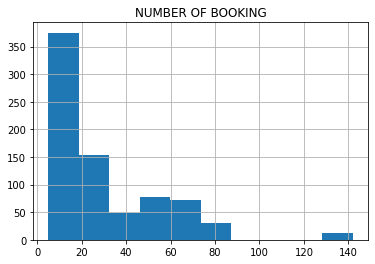

In [17]:
time_series_data.graphical_analysis()

Splitting the time series data into two contiguous sequence and calculating mean and variance to compare the means and variances of the two sequence.

In [18]:
time_series_data.mean_variance_stationary_analysis('NUMBER OF BOOKING')

Mean : 29.1875 29.1875
Variance : 641.1263020833334 661.4283854166666


Mean and variances are almost near which proves that the data might be stationary.

## Rolling Statistics Test

This method gives a visual representation of the data to define its stationarity. A moving variance or moving average graph is plotted and then it is observed whether it varies with time or not.

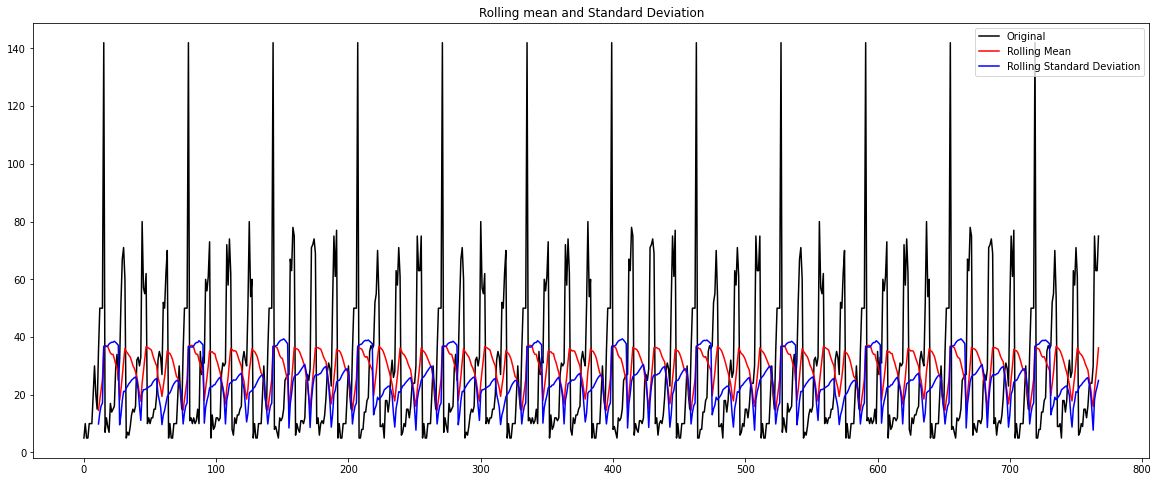

In [19]:
time_series_data.rolling_statistics_test('NUMBER OF BOOKING')

The graph of rolling mean and rolling standard deviation is constant, this shows that the data might be stationary.

## Augmented Dickey-Fuller Test

The Augmented Dickey-Fuller test is one of the more widely used type of statistical test (called a unit root test) that it determines how strongly a time series is defined by a trend.

- The **null hypothesis** of the test is that it is **not stationary** (has some time-dependent structure). The **alternate hypothesis** (rejecting the null hypothesis) is that the time series is **stationary.**

We interpret this result using the p-value from the test.
- p-value > 0.05: Fail to reject the null hypothesis (H0), the data is non-stationary.
- p-value <= 0.05: Reject the null hypothesis (H0), the data is stationary.

In [20]:
time_series_data.augmented_dickey_fuller_test('NUMBER OF BOOKING')

ADF Statistic: -8.52253282391701
p-value: 1.0908656000510532e-13
Critial Values:
   1%, -3.43912257105195
   5%, -2.8654117005229844
   10%, -2.568831705010152

 The Data is Stationary


We can see that our statistic value of **-8.522** is less than the value of -3.44 at 1%. This suggests that we can **reject the null hypothesis** with a significance level of less than 1%.

Rejecting the null hypothesis means that the **time series is stationary or does not have time-dependent structure.**

## Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test

If p-value < 0.05, then the series is non-stationary.

- Null Hypothesis (HO): Series is trend stationary.
- Alternate Hypothesis(HA): Series is non-stationary.

**Note: Hypothesis is reversed in KPSS test compared to ADF Test.**

If the null hypothesis is failed to be rejected, this test may provide evidence that the series is trend stationary.

In [21]:
time_series_data.kwiatkowski_phillips_schmidt_shin_test('NUMBER OF BOOKING')

Results of KPSS Test:
Test Statistic           0.012779
p-value                  0.100000
#Lags Used               6.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64

 The Data is Stationary




/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:2023: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


The p-value 0.1 is > 0.05, which **doesn't fail to reject null hypothesis.**
Therefore, the data is **stationary.**

## Zivot-Andrews Test

In [22]:
time_series_data.zivot_andrews_test('NUMBER OF BOOKING')

Zivot-Andrews Statistic: -8.57
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   10%, -4.57

p-value: 0.000010
Stationary


Since p-value <= 0.05, it is a stationary data.

**Since all three tests ADF, KPSS and Zivot-Andrews tests conclude that the data is stationary, the given series is concluded to be in stationary.**

# Example

The dataset considered contains number of enrollments of students in 6 departments from the Jan-2014 to Dec-2018 in a college where number of Enrollemnts is given for each month.

## Import Dataset

In [23]:
enrollment_data = pd.read_excel("/content/drive/MyDrive/College_Enrollment.xlsx")
enrollment_data

,Department,Date,Number of Enrollments
0,Biotechnology,2018-01-01,101
1,Biotechnology,2018-02-01,99
2,Biotechnology,2018-03-01,101
3,Biotechnology,2018-04-01,89
4,Biotechnology,2018-05-01,99
...,...,...,...
283,Electrical and Electronics Engineering,2021-08-01,118
284,Electrical and Electronics Engineering,2021-09-01,124
285,Electrical and Electronics Engineering,2021-10-01,108
286,Electrical and Electronics Engineering,2021-11-01,106


## Accumulating number of enrollments in all departments with respect to date

In [24]:
enrollment_data = enrollment_data.groupby('Date').sum()
enrollment_data.sample(10)

,Number of Enrollments
Date,
2020-10-01,800
2018-04-01,560
2021-02-01,663
2021-04-01,597
2021-07-01,536
2019-11-01,519
2020-11-01,848
2018-07-01,577
2018-03-01,612


## Pre-processing

### Create object

In [25]:
enrollment_data = TimeSeriesData(enrollment_data, target_column='Number of Enrollments')

### Remove Null and Constant Columns

In [26]:
enrollment_data.drop_columns(enrollment_data.null_columns)
enrollment_data.drop_columns(enrollment_data.constant_column)

enrollment_data.display_columns()

Index(['Number of Enrollments'], dtype='object')


In [27]:
enrollment_data.display_samples()

,Number of Enrollments
Date,
2020-04-01,786
2021-05-01,640
2020-03-01,798
2021-08-01,589
2020-01-01,791
2021-02-01,663
2019-01-01,566
2019-08-01,647
2018-05-01,676


## Graphical

The plot below depicts the number of enrollments from the year January 2018 to December 2021.

From the plot, it can be seen that there is a trend in the data in the date January 2020 till December 2020. From this, it can be proved that the data is **non-stationary.**

But still, let us perform some tests to prove mathematically / statistically whether the data is stationary or non-stationary.

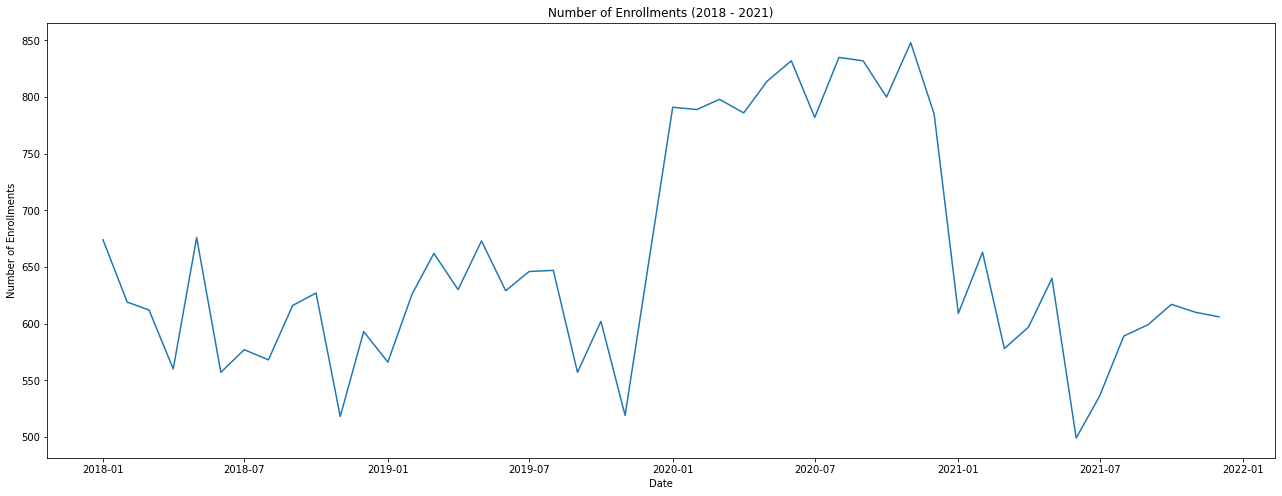

In [28]:
enrollment_data.distribution_plot('Number of Enrollments')

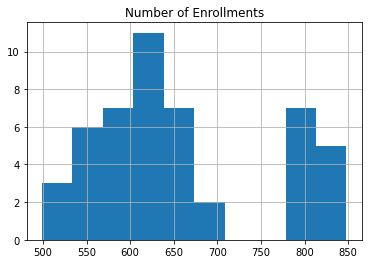

In [29]:
enrollment_data.graphical_analysis()

Splitting the time series data into two contiguous sequence and calculating mean and variance to compare the means and variances of the two sequence.

In [30]:
enrollment_data.mean_variance_stationary_analysis('Number of Enrollments')

Mean : 608.625 701.4583333333334
Variance : 2126.0677083333335 12394.164930555555


Mean and variances of the two splits are not even close, which proves that the data might not be stationary.

## Rolling-Statistics Test

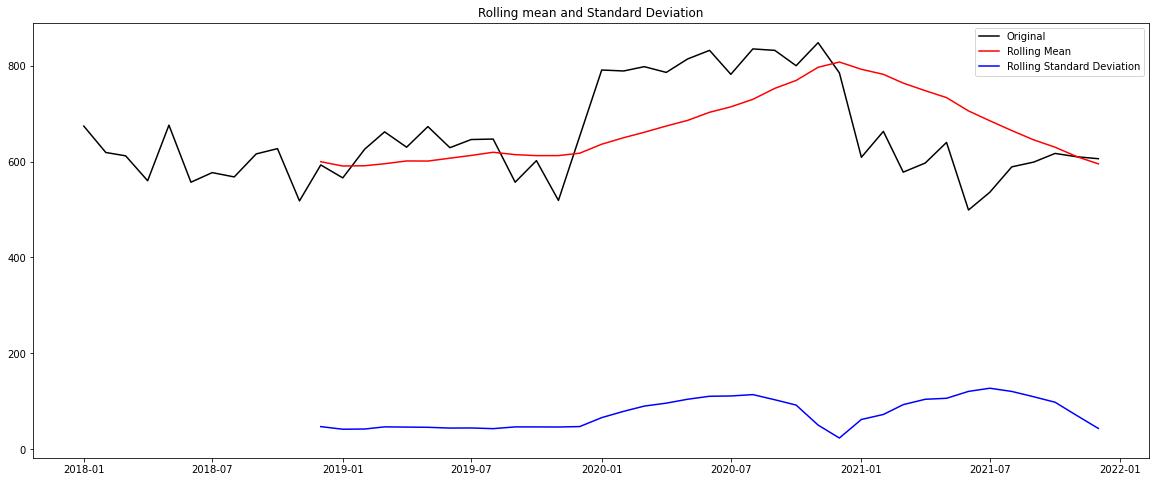

In [31]:
enrollment_data.rolling_statistics_test('Number of Enrollments')

The graph of rolling mean and rolling standard deviation is not constant at every time intervals, this shows that the dataset might be **non-stationary**.

## Augmented Dickey-Fuller Test

In [32]:
enrollment_data.augmented_dickey_fuller_test('Number of Enrollments')

ADF Statistic: -2.160524410739529
p-value: 0.2208833697150417
Critial Values:
   1%, -3.596635636000432
   5%, -2.933297331821618
   10%, -2.6049909750566895

The Data is Non-Stationary


We can see that our statistic value of **-2.16** is greater than the value of -3.60 at 1%. This suggests that we **can not reject the null hypothesis** with a significance level of less than 1%.

Accepting the null hypothesis means that the **time series is non-stationary or it have time-dependent structure** according to ADF test.

## Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test

In [33]:
enrollment_data.kwiatkowski_phillips_schmidt_shin_test('Number of Enrollments')

Results of KPSS Test:
Test Statistic           0.210379
p-value                  0.100000
#Lags Used               4.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64

 The Data is Stationary




/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:2023: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


The p-value 0.1 is > 0.05, which **doesn't fail to reject null hypothesis.**
Therefore, the data is **stationary** according to KPSS test.

## Zivot-Andrews Test

In [34]:
enrollment_data.zivot_andrews_test('Number of Enrollments')

Zivot-Andrews Statistic: -4.21
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   10%, -4.57

p-value: 0.235844
Non-Stationary


Since p-value > 0.05, it is **not a stationary data** according to Zivot-Andrews Test.

## **Conclusion :**
- Mean and Variance of the splitted data proves the data to be **non-stationary.**
- Rolling-Statistics proves the data to be **non-stationary.**
- ADF test proves the data to be **non-stationary.**
- KPSS test proves the data to be **stationary.**
- Zivot-Andrews test proves the data to be **non-stationary.**

Therefore, the majority of the tests proves the data to be **non-stationary.**

## Convert to Stationary
To transform the data to stationary, is **differentiating.**

Let us perform three orders of differences on the 'Number of Enrollments' column.

### Calculating Derivatives

In [35]:
enrollment_data.calculating_derivatives()
enrollment_data.display_samples()

,Number of Enrollments,diff_1,diff_2,diff_3
Date,,,,
2020-04-01,786,-12.0,-3.0,-5.0
2021-05-01,640,43.0,62.0,-23.0
2020-03-01,798,9.0,7.0,145.0
2021-08-01,589,53.0,90.0,-51.0
2020-01-01,791,138.0,272.0,189.0
2021-02-01,663,54.0,-122.0,-185.0
2019-01-01,566,-27.0,48.0,-61.0
2019-08-01,647,1.0,18.0,-26.0
2018-05-01,676,116.0,64.0,57.0


ADF Statistic: -2.160524410739529
p-value: 0.2208833697150417
Critial Values:
   1%, -3.596635636000432
   5%, -2.933297331821618
   10%, -2.6049909750566895

The Data is Non-Stationary


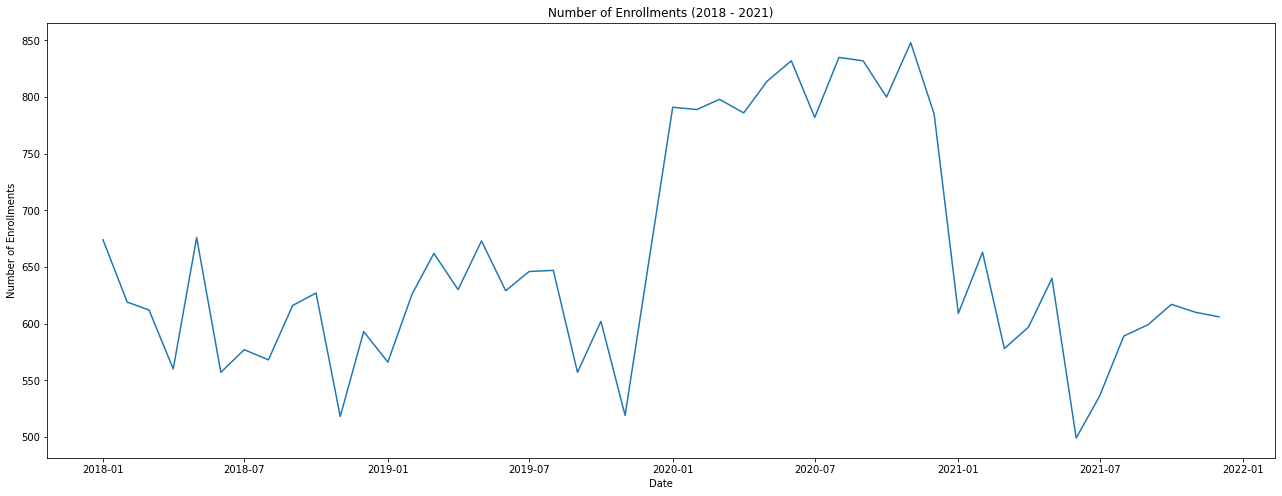

In [36]:
enrollment_data.augmented_dickey_fuller_test('Number of Enrollments')
enrollment_data.distribution_plot('Number of Enrollments')

We can see that our statistic value of **-2.16** is greater than the value of -3.44 at 1%. This suggests that we **can not reject the null hypothesis** with a significance level of less than 1%.

Accepting the null hypothesis means that the **time series is non-stationary or it have time-dependent structure** according to ADF test.

### ADF tests on derivatives

#### First-Order Difference

ADF Statistic: -2.607621497021281
p-value: 0.09143226802145005
Critial Values:
   1%, -3.596635636000432
   5%, -2.933297331821618
   10%, -2.6049909750566895

The Data is Non-Stationary


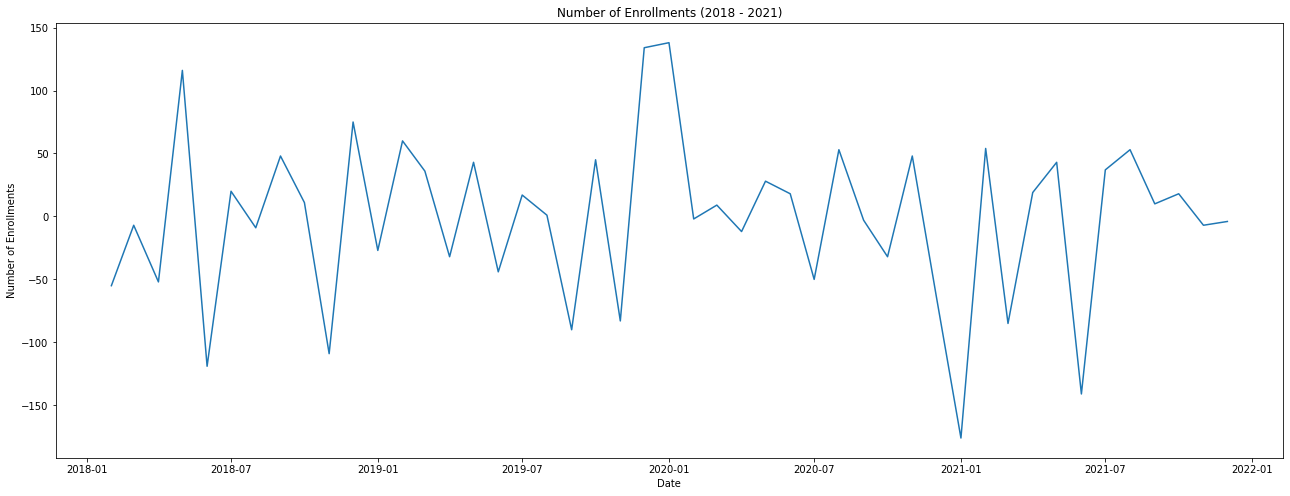

In [37]:
enrollment_data.augmented_dickey_fuller_test('diff_1')
enrollment_data.distribution_plot('diff_1')

We can see that our statistic value of **-2.607** is greater than the value of -3.60 at 1%. This suggests that we **can not reject the null hypothesis** with a significance level of less than 1%.

Accepting the null hypothesis means that the **time series is non-stationary or it have time-dependent structure**.

#### Second-Order Difference

ADF Statistic: -2.737569268981533
p-value: 0.0677596974413701
Critial Values:
   1%, -3.6055648906249997
   5%, -2.937069375
   10%, -2.606985625

The Data is Non-Stationary


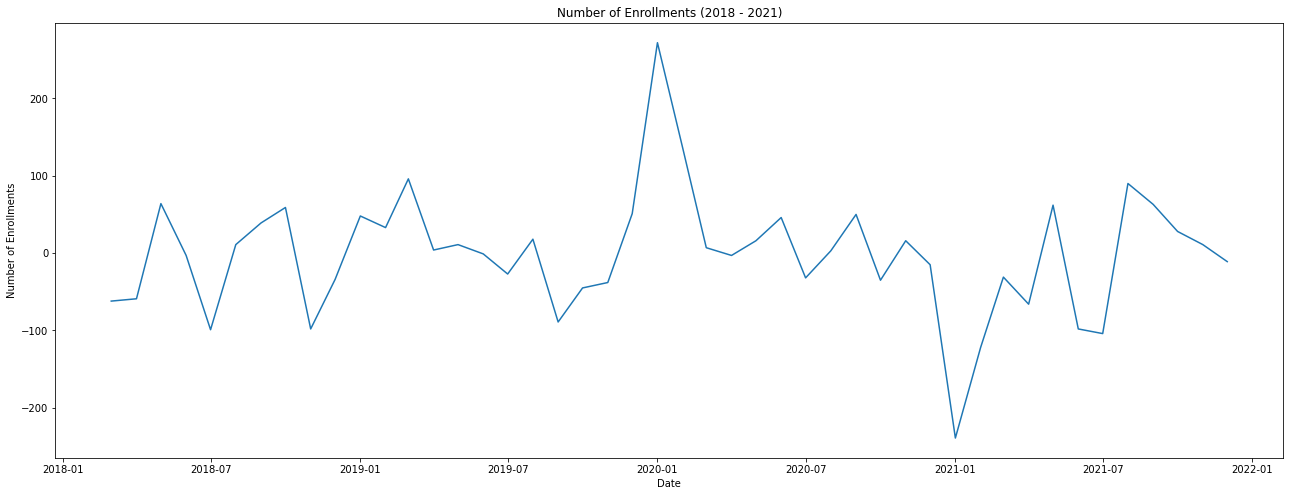

In [38]:
enrollment_data.augmented_dickey_fuller_test('diff_2')
enrollment_data.distribution_plot('diff_2')

We can see that our statistic value of **-2.74** is greater than the value of -3.61 at 1%. This suggests that we **can not reject the null hypothesis** with a significance level of less than 1%.

Accepting the null hypothesis means that the **time series is non-stationary or it have time-dependent structure**.

#### Third-Order Difference

ADF Statistic: -2.9231663307597175
p-value: 0.04271963058833072
Critial Values:
   1%, -3.610399601308181
   5%, -2.939108945868946
   10%, -2.6080629651545038

The Data is Non-Stationary


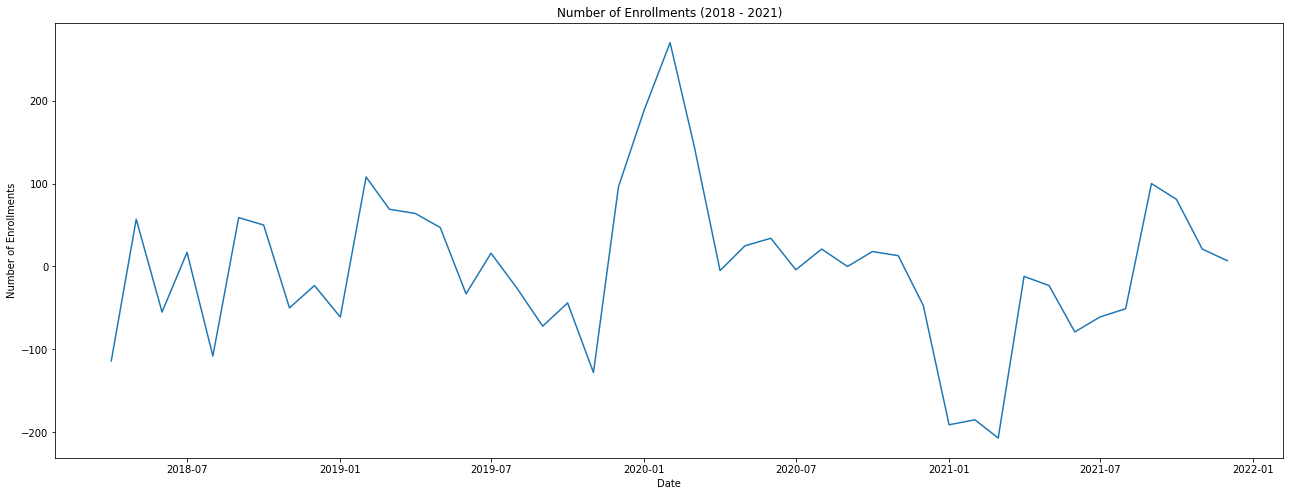

In [39]:
enrollment_data.augmented_dickey_fuller_test('diff_3')
enrollment_data.distribution_plot('diff_3')

We can see that our statistic value of **-2.92** is greater than the value of -3.61 at 1%. This suggests that we **can not reject the null hypothesis** with a significance level of less than 1%.

Accepting the null hypothesis means that the **time series is non-stationary or it have time-dependent structure**.

### Calculating First-Order Derivative on Logarithmically transformed data

Now, we will transform the data by logarithmic function and then, take the first-order difference to check for stationarity

In [40]:
enrollment_data.log_transform_derivative_1()

### ADF test on Transformed derivative

ADF Statistic: -9.510294279497844
p-value: 3.263135273864606e-16
Critial Values:
   1%, -3.5812576580093696
   5%, -2.9267849124681518
   10%, -2.6015409829867675

 The Data is Stationary


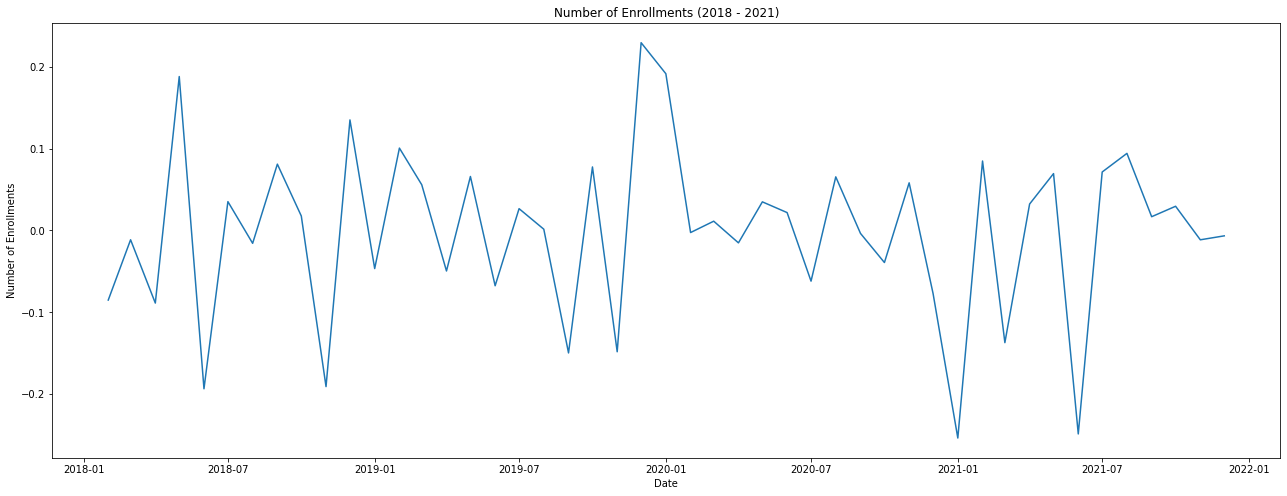

In [41]:
enrollment_data.augmented_dickey_fuller_test('log_diff_1')
enrollment_data.distribution_plot('log_diff_1')

We can see that our statistic value of **-9.51** is lesser than the value of -3.58 at 1%. This suggests that we **can reject the null hypothesis** with a significance level of less than 1%.

Rejecting the null hypothesis means that the **time series is stationary or it does not have time-dependent structure**.

### KPSS test on Transformed derivative

In [42]:
enrollment_data.kwiatkowski_phillips_schmidt_shin_test('log_diff_1')

Results of KPSS Test:
Test Statistic           0.077049
p-value                  0.100000
#Lags Used               3.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64

 The Data is Stationary




/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:2023: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


The p-value 0.1 is > 0.05, which **doesn't fail to reject null hypothesis.**
Therefore, the data is **stationary** according to KPSS test.

### Zivot-Andrews Test on Transformed derivative

In [43]:
enrollment_data.zivot_andrews_test('log_diff_1')

Zivot-Andrews Statistic: -9.82
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   10%, -4.57

p-value: 0.000010
Stationary


Since p-value <= 0.05, it is **a stationary data**.

### Rolling-Statistics Test

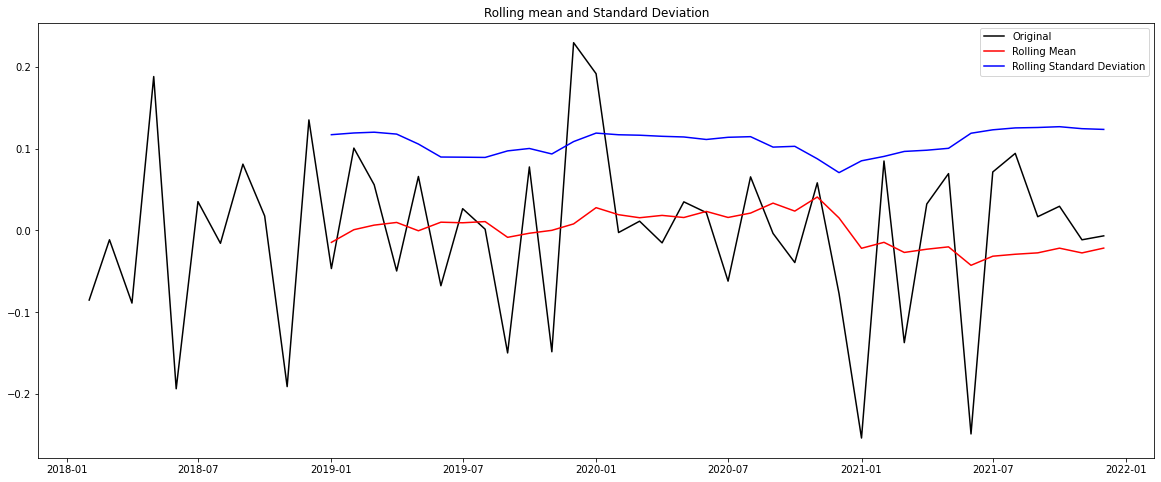

In [44]:
enrollment_data.rolling_statistics_test('log_diff_1')

The graph of rolling mean and rolling standard deviation is almost constant in every time intervals, therefore the dataset might be **stationary**.

## **Conclusion :**
- Rolling-Statistics might prove that the data is **stationary.**
- ADF test proves the data to be **stationary.**
- KPSS test proves the data to be **stationary.**
- Zivot-Andrews test proves the data to be **stationary.**

Therefore, the majority of the tests proves the data to be **stationary.**

Hence, the non-stationary data is transformed into stationary data.